<a href="https://colab.research.google.com/github/danielfrgs/LCD-PCCD-2021-1/blob/main/Otras_formas_de_Agrupar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.mixture import GaussianMixture
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


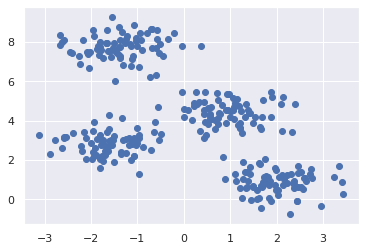

In [7]:
X, y = make_blobs(n_samples=300, centers= 4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

Text(0.5, 0, 'número de grupos')

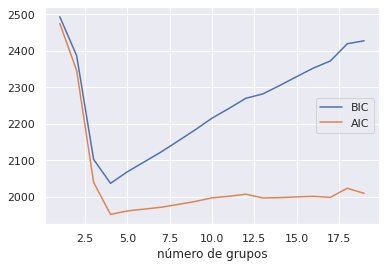

In [12]:
n_cluster = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_cluster]
# Creiterio bayeciano
plt.plot(n_cluster, [m.bic(X) for m in models], label = 'BIC')
# Criterio akaike
plt.plot(n_cluster, [m.aic(X) for m in models], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('número de grupos')

In [13]:
gmn = GaussianMixture(n_components=4)
gmn.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

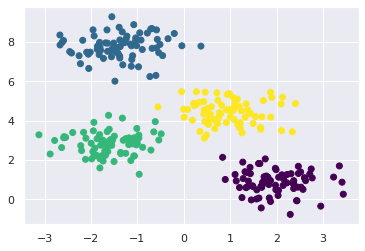

In [15]:
labels = gmn.predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', c=labels)

In [16]:
#####----------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [18]:
# https://bit.ly/3Bic3iu
X_train = np.load('data.npy')

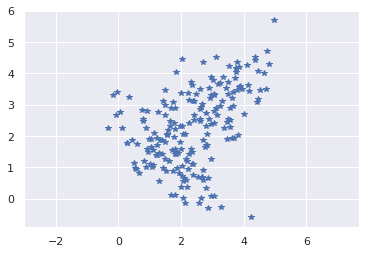

In [20]:
plt.plot(X_train[:,0], X_train[:,1], 'b*')
plt.axis('equal')
plt.show()

In [21]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
print('Medias: \n', gmm.means_)
print('Covarianzas: \n', gmm.covariances_)

Medias: 
 [[3.04641134 3.10654272]
 [1.60718016 1.35251723]]
Covarianzas: 
 [[[ 0.83656079  0.37865596]
  [ 0.37865596  0.72727426]]

 [[ 0.74995307 -0.5010097 ]
  [-0.5010097   0.74377694]]]


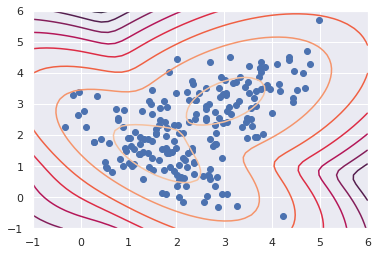

In [24]:
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1, 6))
XX = np.array([X.ravel(), Y.ravel()]).T
z = gmm.score_samples(XX)
z = z.reshape([50, 50])

plt.contour(X, Y, z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [31]:
# DBSCAN

import numpy as np
from sklearn.cluster import DBSCAN
np.random.seed(1)
r_data = np.random.randn(50000, 2)*20 + 20

dbs = DBSCAN(min_samples=2, eps = 3)
clusters = dbs.fit_predict(r_data)
# Se pide que nos cuente de los 50,000 datos cuantos son anaomalos
list(clusters).count(-1)

94

In [32]:
import pandas as pd
from pylab import  rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import  DBSCAN
from collections import Counter

rcParams['figure.figsize'] = 5, 4

In [35]:
df = pd.read_csv("https://bit.ly/3arouNg")
df.head()

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
# Para poder visualizar en 2D
data = df.iloc[:, 1:3]
data.head()

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23


In [36]:
dbs = DBSCAN(eps = 0.2, min_samples=20).fit(data)
print(dbs)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)


In [38]:
print(Counter(dbs.labels_))
outliers = pd.DataFrame(data)
print(outliers[dbs.labels_ == -1])

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


Text(0.5, 1.0, 'DBSCAN')

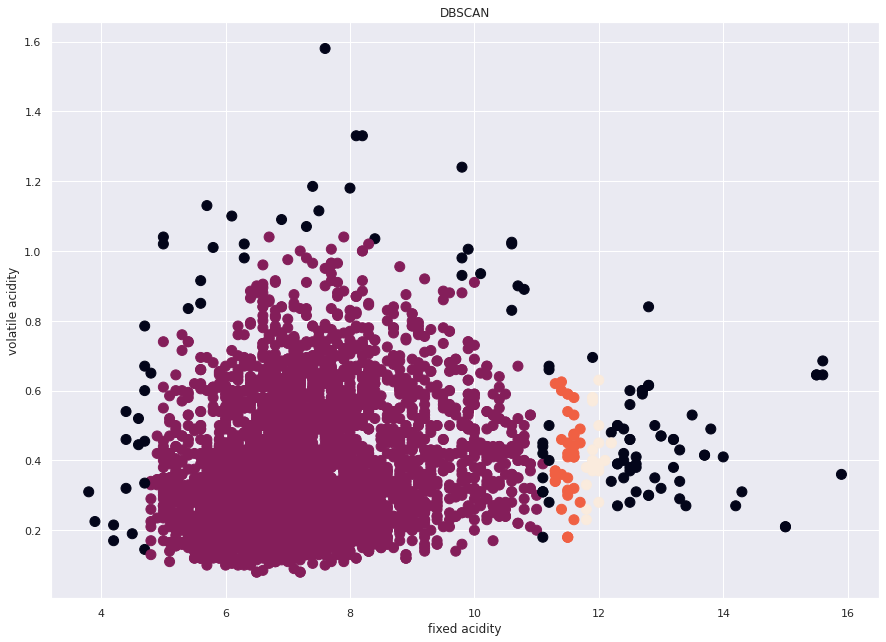

In [40]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2.3, 2])
colors = dbs.labels_

ax.scatter(data.iloc[:, 0].values, data.iloc[:, 1].values, c = colors, s = 100)

ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
plt.title('DBSCAN')
